# SHIKHAR SAXENA 

# Data Science and Business Analytics Intern


# TASK- 4: Exploratory Data Analysis - Terrorism 

# AIM: As a security/defense analyst, try to find out the hot zone of terrorism.

In [16]:
#importing the required libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
from folium.plugins import MarkerCluster

%matplotlib inline

In [18]:
#loading the dataset 

df = pd.read_csv('C:\\Users\\KIIT\\Desktop\\Global Terrorism - START data\\globalterrorismdb_0718dist.csv', encoding ='ISO-8859-1')
df

C:\Users\KIIT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [19]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [20]:
df=df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [21]:
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [22]:
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [23]:
df.dtypes

Year             int64
Month            int64
Extended         int64
Day              int64
Country         object
state           object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [25]:
#getting the statistical information of the dataset

df.describe()

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [26]:
#Analysing places where most attacks has happened

print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


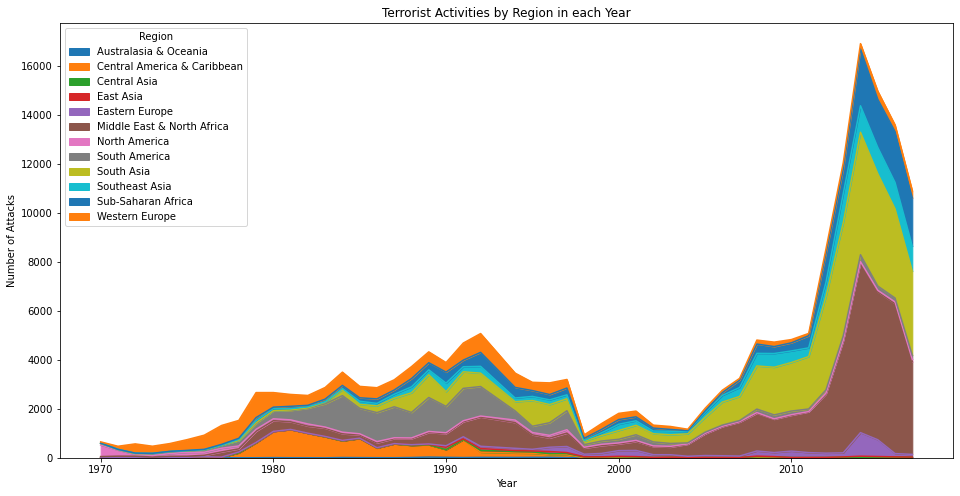

In [33]:
#Terrorist Activities by Region in each Year through Area Plot

pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(16,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


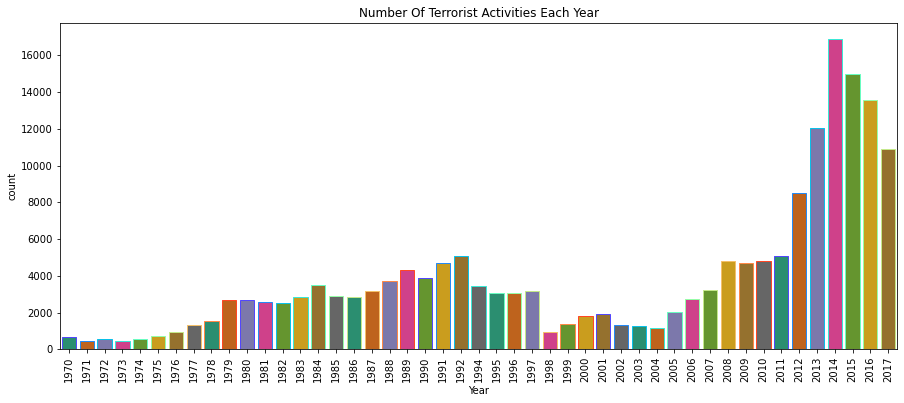

In [36]:
#Number of Terrorist Activities each Year

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='Dark2',edgecolor=sns.color_palette("rainbow", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [42]:
df['Wounded'] =df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

<ipython-input-42-443d7ee7aeaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wounded'] =df['Wounded'].fillna(0).astype(int)
<ipython-input-42-443d7ee7aeaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Killed'] = df['Killed'].fillna(0).astype(int)
<ipython-input-42-443d7ee7aeaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [43]:
#Values are sorted by the top 40 worst terror attacks

df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [44]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [51]:
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)


In [39]:
df.Country.value_counts()[:16]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
Name: Country, dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


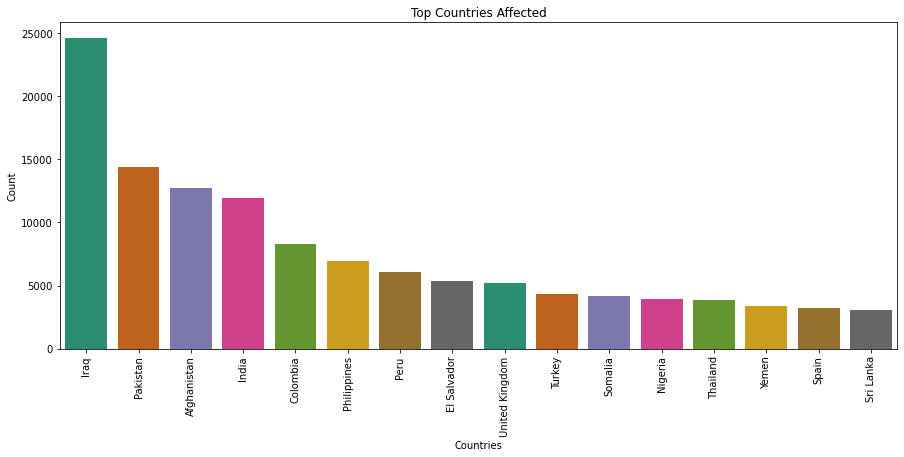

In [40]:
#analysing the Top Countries affected most by Terror Attacks

plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:16].index,df['Country'].value_counts()[:16].values,palette='Dark2')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Iran is the country which has been affected most by Terror attacks. 

In [52]:
#Now we are visualizing the top four countries that have suffered the most

terror_df =df[(df['Group'] != 'Unknown') & (df['casualities'] > 50)]
terror_df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,0,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,0,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,0,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,0,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,1,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [53]:
terror_df = terror_df.sort_values(['Region', 'Country'])

In [54]:
terror_df.isnull().sum()

Year              0
Month             0
Extended          0
Day               0
Country           0
state             3
Region            0
city              1
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

In [55]:
terror_df = terror_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [56]:
terror_df = terror_df.dropna(subset=['city'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



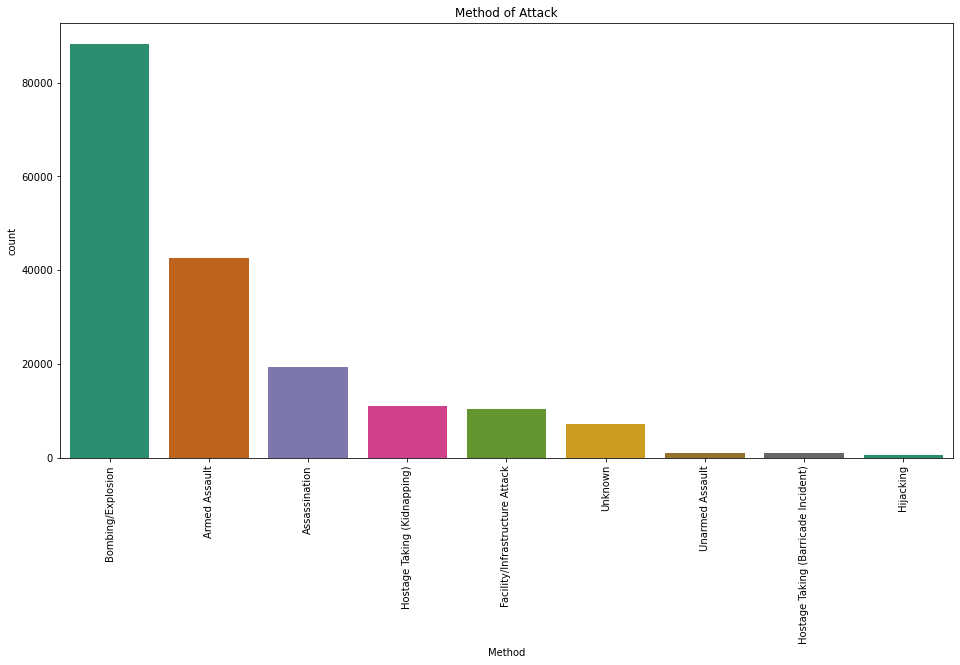

In [58]:
#now we are analysing Methods of Attack 

plt.figure(figsize=(16,8))
sns.countplot(df['AttackType'],data=df,order=df['AttackType'].value_counts().index,
              palette='Dark2')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

Bombing/Explosion is the most frequent method of attack.

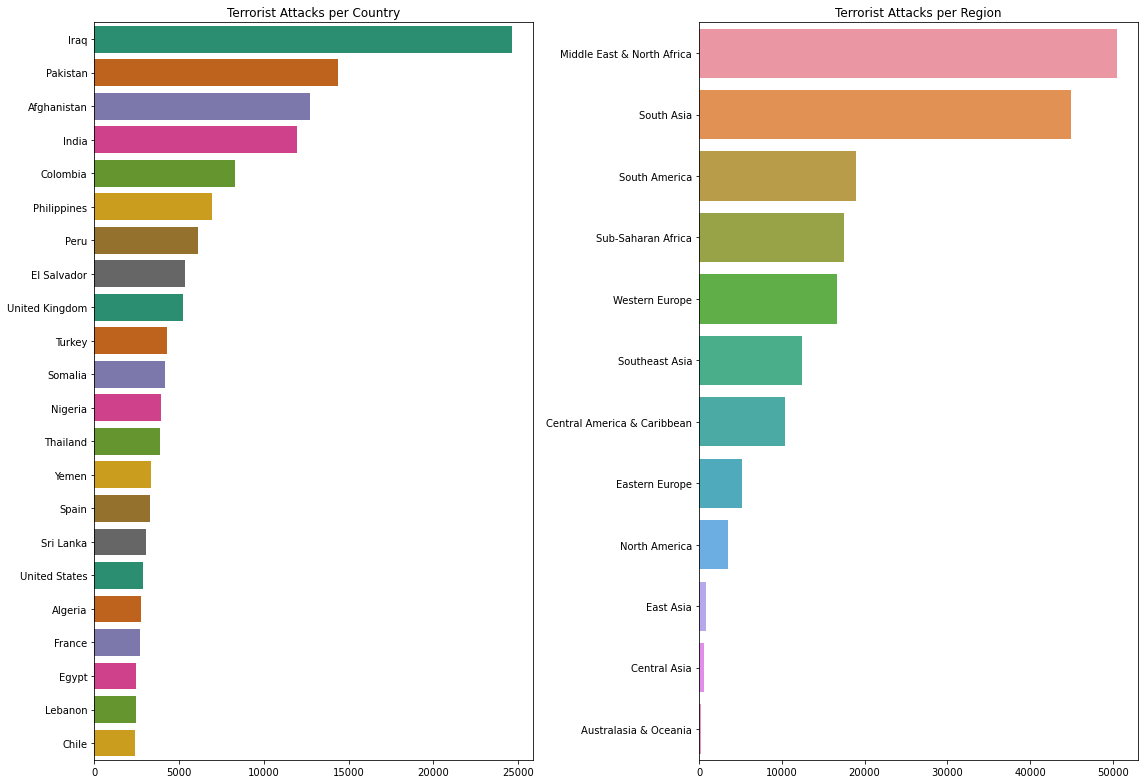

In [61]:
#Now we are analysing Terrorist attacks Country wise and Region wise 

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:22].values, y = df['Country'].value_counts()[:22].index, 
            ax=axes[0],palette = 'Dark2');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

Iraq is the Country having highest Terror attacks and Middle-East and North Africa is the Region having highest Terror attacks. 

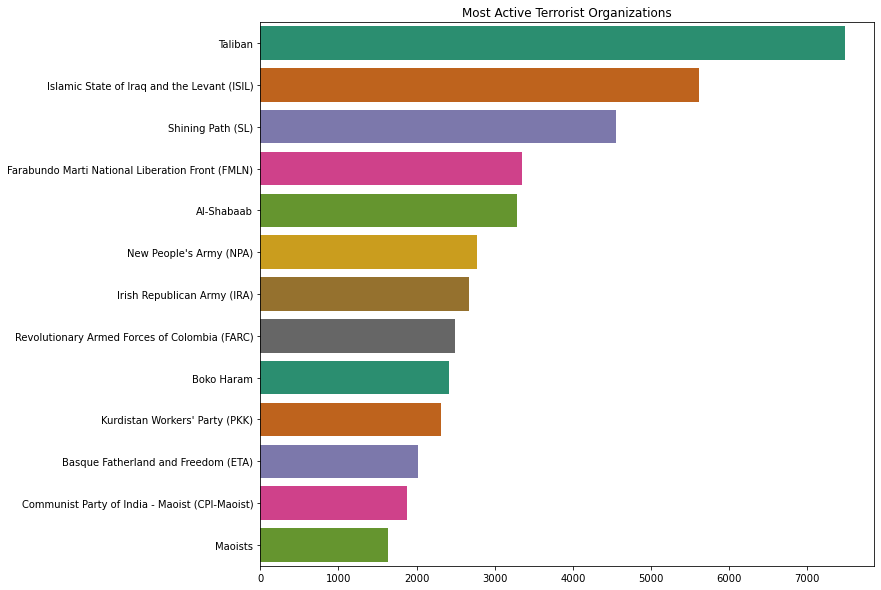

In [64]:
#Most active organizations

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:14].index,x=df['Group'].value_counts()[1:14].values,
           palette='Dark2')
plt.title('Most Active Terrorist Organizations')
plt.show()

Taliban is the Most Active Terrorist Organization. 

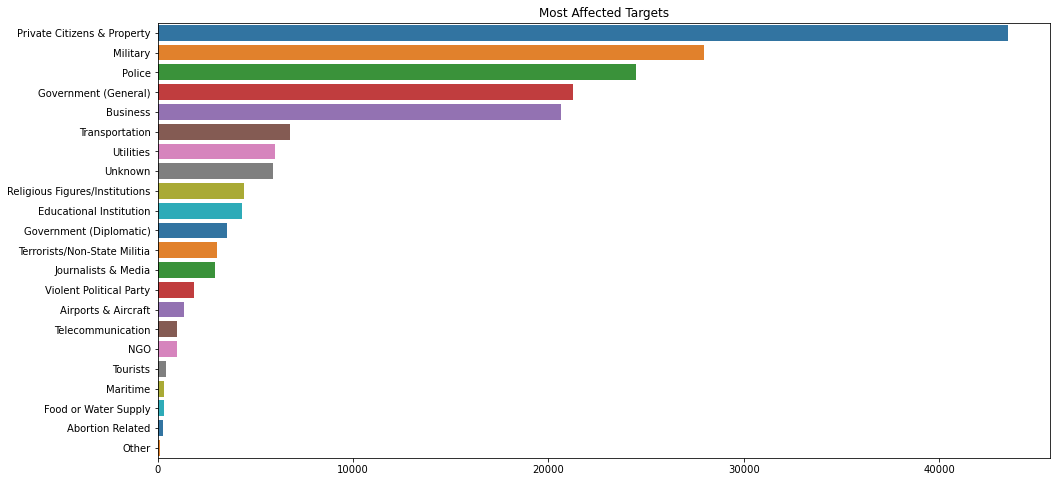

In [65]:
#Most affected targets

plt.subplots(figsize=(16,8))
sns.barplot(y=df['Target_type'].value_counts().index,x=df['Target_type'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

Private Citizens and Property are most affected by Terror attacks. 

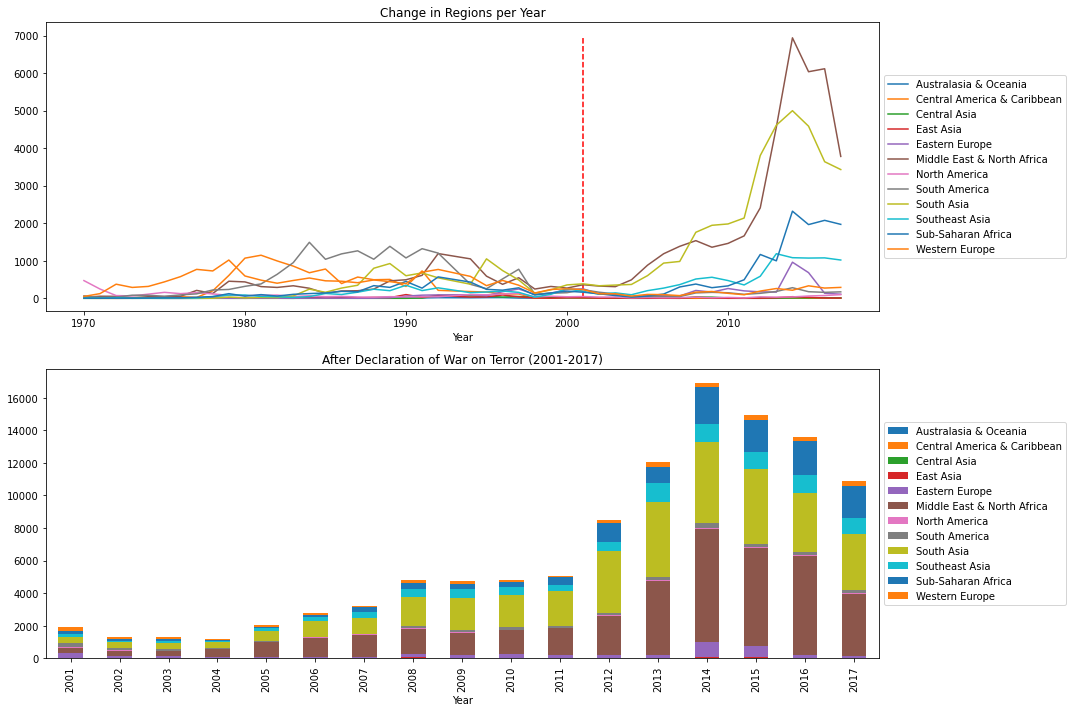

In [68]:
#Before and after the War on Terror

#After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal
#to distinguish terrorism primarily in the Middle East.

df_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
fig.tight_layout()
plt.show()

Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000.
After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



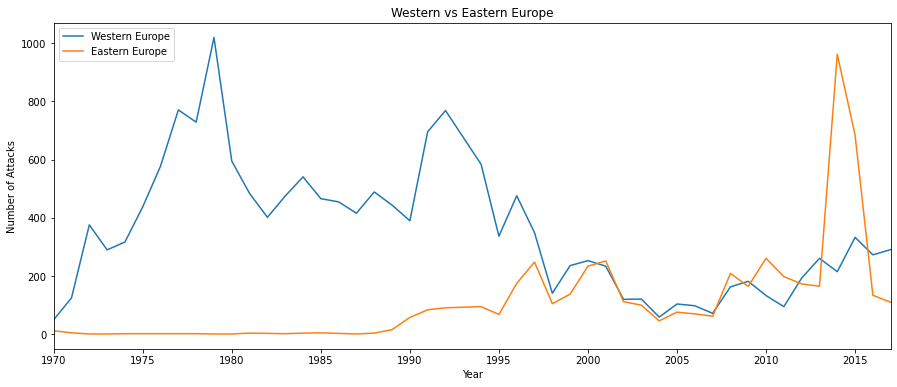

In [72]:
#The shift from Western Europe to Eastern Europe 

fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
             df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
             df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

Though Western Europe has seen considerably more terrorism in the past, there is now a shift in activity towards the east. 1991 seems to be a turning point after which terrorism shifted towards Eastern Europe. 

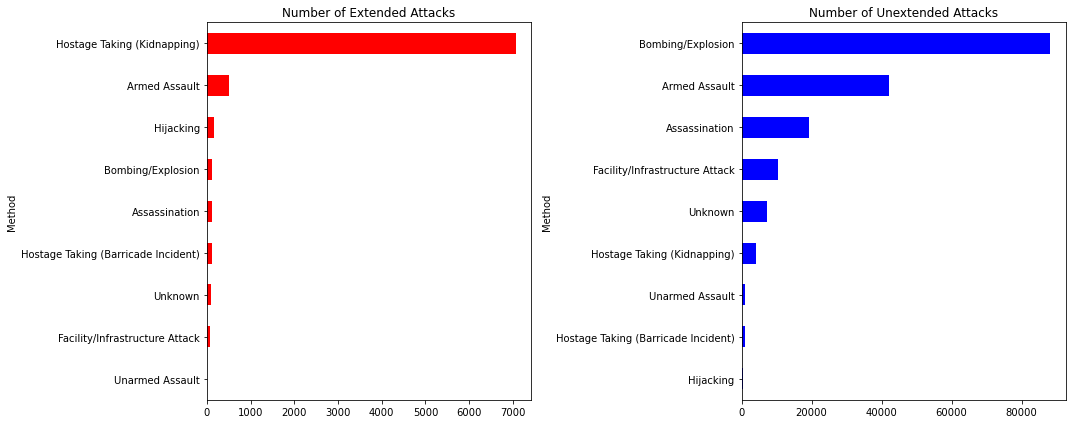

In [73]:
#Analysing Extended Attacks 

fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=df[df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

Extended Attacks consits major of Hostage Taking. On the other hand, Unextended Attacks seems to be a bit more spread between Bombings/Explosions, Armed Assaults and Assassinations. 